## Memprediksi dari data yang masuk, apa jenis bunga iris ini

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

mengambil data load_iris dengan sklern

In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [7]:
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


Nilai dari key target adalah huruf berbetuk array, yang berisi 
nama bunga yang akan kita prediksi

In [17]:
print("Target names : {}".format(iris_dataset['target_names']))

Target names : ['setosa' 'versicolor' 'virginica']


untuk mengetahui list nama Feature

In [19]:
print("Nama Feature: \n{}".format(iris_dataset['feature_names']))

Nama Feature: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [21]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


Array berisi 150 jenis bunga, kita akan melihat feature dari ke lima sample

In [22]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


kolom 1 sampai 4
'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

In [24]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


target adalah one-dimensional array (array 1 dimensi),
dengan 1 entry per bunga

In [25]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [26]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


spesies bunga dirubah kodenya menjadi integer (angka) dari 1 ke 2


In [27]:
# 0 berarti bunga iris setosa
# 1 berarti bunga iris versicolor
# 2 berarti bunga iris virginica

150 data tersebut akan kita bagi menjadi 2 yaitu data training dan data test
training sebanyak 75% dan 25% sebagai data test
75% dari 150 = 112,5  ; 25% dari 150 = 37,5

kita panggil dulu fungsi train test split, dan menggunakan data dan target yg memiliki type nd array

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

If you don't mention the random_state in the code, then whenever you execute your code a new random value is generated and the train and test datasets would have different values each time

fungsi train_test_split akan mengacak data set menggunakan Pseudorandom generator

In [28]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [29]:
# 112 = 75% dari jumlah data 150

In [30]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [31]:
# 38 = 25% dari jumlah data 150

Memeriksa data, salah satu cara adalah dengan Scatter plot, scatter plot adalah meletakkan data di sumbu x dan sumbu y

Untuk menhasilkan plot, kita pertama2 akan mengubah array numpy menjadi pandas data frame

Pandas memiliki fungsi untuk menciptakan pasangan plots yang dinamakan dengan scatter_matrix

In [35]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)


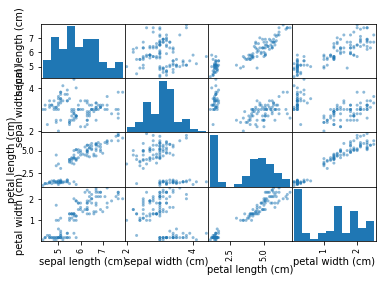

In [40]:
grr = pd.plotting.scatter_matrix(iris_dataframe)

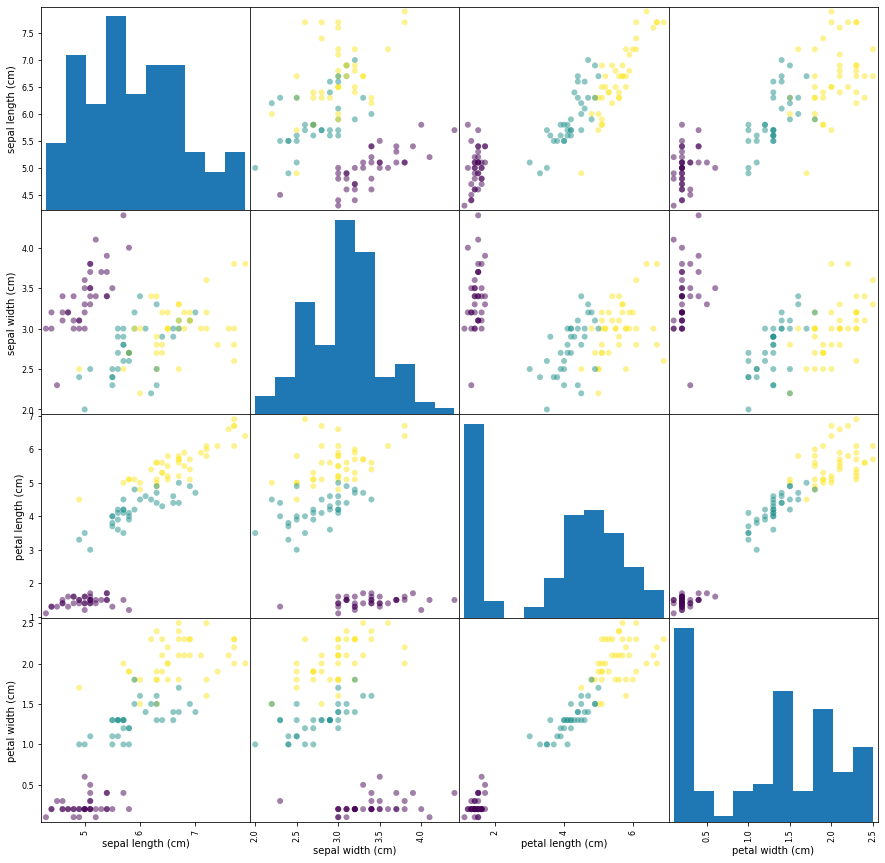

In [43]:
grr = pd.plotting.scatter_matrix(iris_dataframe, 
    c=y_train, figsize=(15,15), marker='o')

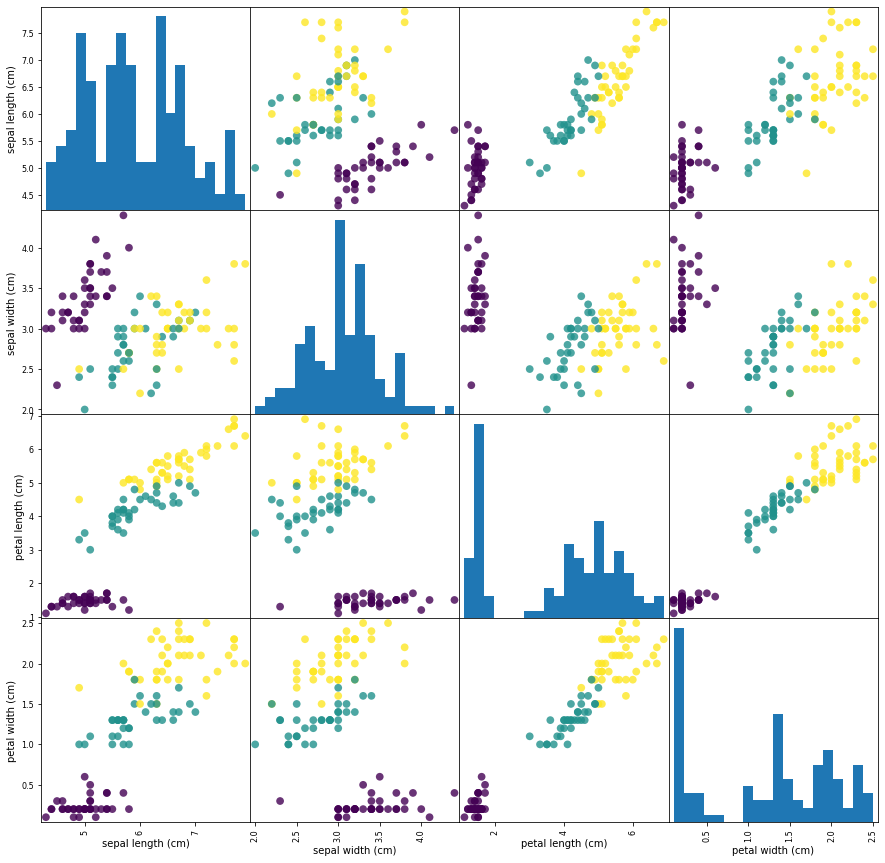

In [54]:
grr = pd.plotting.scatter_matrix(iris_dataframe, 
    c=y_train, figsize=(15,15), marker='o',
    hist_kwds={'bins':20}, s=60,alpha=.8)

dari histogram diatas, ke 3 kelas terpisah dengan jelas dikelompokkan berdasarkan warna2 yang berkumpul sesuai dengan cluster nya

## Building Your First Model: k-Nearest Neighbors

Now we can start building the actual machine learning model. There are many classification
algorithms in scikit-learn that we could use. Here we will use a k-nearest
neighbors classifier, which is easy to understand. Building this model only consists of
storing the training set. To make a prediction for a new data point, the algorithm
finds the point in the training set that is closest to the new point. Then it assigns the
label of this training point to the new data point

terjemahan

Sekarang kita dapat mulai membangun model pembelajaran mesin yang sebenarnya. Ada banyak klasifikasi
algoritma di scikit-learn yang bisa kita gunakan. Di sini kita akan menggunakan k-nearest (tetangga terdekat)
classifier, yang mudah dimengerti. Membangun model ini hanya terdiri dari
menyimpan set pelatihan. Untuk membuat prediksi untuk titik data baru, algoritma
menemukan titik dalam set pelatihan yang paling dekat dengan titik baru. Kemudian ia menetapkan
label titik pelatihan ini ke titik data baru

The k in k-nearest neighbors signifies that instead of using only the closest neighbor
to the new data point, we can consider any fixed number k of neighbors in the training
(for example, the closest three or five neighbors). Then, we can make a prediction
using the majority class among these neighbors

terjemahan

K di k-nearest neighbours menandakan bahwa alih-alih hanya menggunakan tetangga terdekat
ke titik data baru, 
kita dapat mempertimbangkan sejumlah k neighbours (tetangga) tetap dalam data training
(misalnya, tiga atau lima tetangga terdekat). Kemudian, kita bisa membuat prediksi
menggunakan kelas mayoritas di antara tetangga ini

kita akan men setup jumlah tetangga denkat dari k adalah 1

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Making Predictions

Imagine we found an iris in the wild with 

a sepal length of 5 cm, 
a sepal width of 2.9 cm, 
a petal length of 1 cm, 
and a petal width of 0.2 cm.

What species of iris would this be?

We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4)

In [59]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a twodimensional
NumPy array, as scikit-learn always expects two-dimensional arrays
for the data.
To make a prediction, we call the predict method of the knn object

In [60]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to the class 0, meaning its species is
setosa

But how do we know whether we can trust our model? We don’t know the correct
species of this sample, which is the whole point of building the model

## Evaluating the Model

This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.
Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
computing the accuracy, which is the fraction of flowers for which the right species
was predicted

terjemahan :
    
Di sinilah test set yang kita buat sebelumnya masuk. Data ini tidak digunakan untuk membangun model, tapi kita tahu spesies yang benar untuk setiap iris di test set. Oleh karena itu, kita dapat membuat prediksi untuk setiap iris dalam data uji dan membandingkannya dengan labelnya (spesies yang diketahui). Kita dapat mengukur seberapa baik model bekerja dengan menghitung akurasi, yang merupakan fraksi bunga yang diprediksi spesiesnya tepat

In [61]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [62]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


We can also use the score method of the knn object, which will compute the test set
accuracy for us:

In [63]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right
prediction for 97% of the irises in the test set. 
Under some mathematical assumptions,
this means that we can expect our model to be correct 97% of the time for new
irises. For our hobby botanist application, this high level of accuracy means that our
model may be trustworthy enough to use. 

terjemahan :
    
Untuk model ini, akurasi set tes adalah sekitar 0,97, yang berarti kami membuat yang benar
prediksi untuk 97% dari iris di set tes. 

Di bawah beberapa asumsi matematika,
ini berarti bahwa kita dapat mengharapkan model kita benar 97% dari waktu untuk yang baru
iris. Untuk aplikasi ahli botani hobi kami, tingkat akurasi yang tinggi ini berarti bahwa
model mungkin cukup dapat dipercaya untuk digunakan. 